# **Understanding User Engagement Patterns  and Real time data analysis on X**

**Kalpana N  
2347229   
ESE-1 Assignment**

## Problem Statement

__*The objective of this Assignment is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or abusive sentiment associated with it. So, the task is to classify racist or abusive tweets from other tweets.*__

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/abusive and label '0' denotes the tweet is not racist/abusive, your objective is to predict the labels on the test dataset.


## Loading Libraries and Data

In [1]:
import re 
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Let's read train and test datasets.

In [2]:
train  = pd.read_csv('Twitter Sentiments.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

## Text PreProcessing and Cleaning

### Data Inspection

Let's check out a few non racist/abusive tweets.

In [3]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


<br>
Now check out a few racist/abusive tweets.


In [4]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Let's check dimensions of the train and test dataset.

In [5]:
train.shape, test.shape

((31962, 3), (17197, 2))

*Train set has 31,962 tweets and test set has 17,197 tweets.*

Let's have a glimpse at label-distribution in the train dataset.

In [6]:
train["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

*In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/abusive. So, it is an imbalanced classification challenge.*

<br>
Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

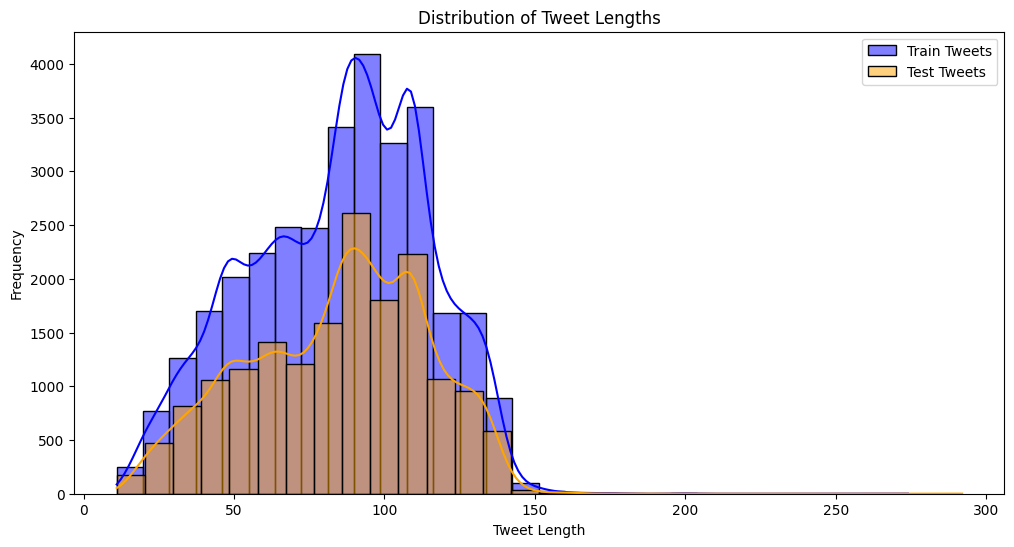

In [7]:
import seaborn as sns


# Calculate the lengths of the tweets
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

# Distribution of tweet lengths
plt.figure(figsize=(12, 6))
sns.histplot(length_train, bins=30, kde=True, color='blue', label='Train Tweets')
sns.histplot(length_test, bins=30, kde=True, color='orange', label='Test Tweets')
plt.legend()
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


*The tweet-length distribution is more or less the same in both train and test data.*

### Data Cleaning

In [8]:
# Concatenate train and test datasets
combi = pd.concat([train, test], ignore_index=True)
combi.shape


(49159, 3)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

__1. Removing Twitter Handles (@user)__

In [10]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


__2. Removing Punctuations, Numbers, and Special Characters__

In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


__3. Removing Short Words__

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Let’s take another look at the first few rows of the combined dataframe.

In [13]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


__4. Text Normalization__

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [14]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

*Now let’s stitch these tokens back together.*

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

<br>   
Story Generation and Visualization from Tweets

__A) Understanding the common words used in the tweets: WordCloud__

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

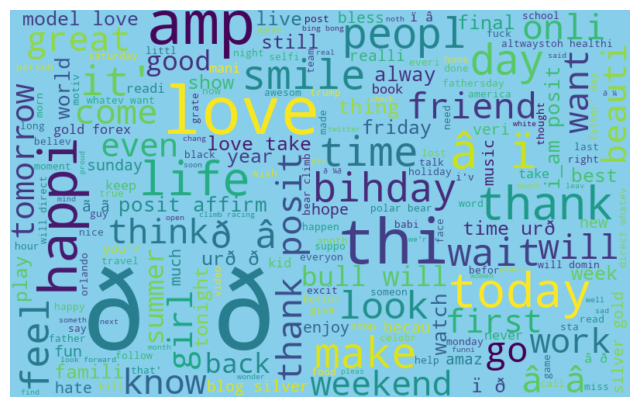

In [17]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=140,background_color='skyblue').generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, family, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/abusive or not) in our train data.

__B) Words in non racist/sexist tweets__

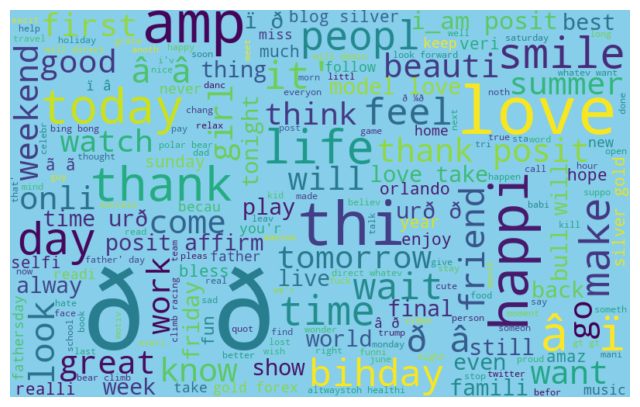

In [18]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=140,background_color="skyblue").generate(normal_words)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and abusive terms.

__C) Racist/Sexist Tweets__

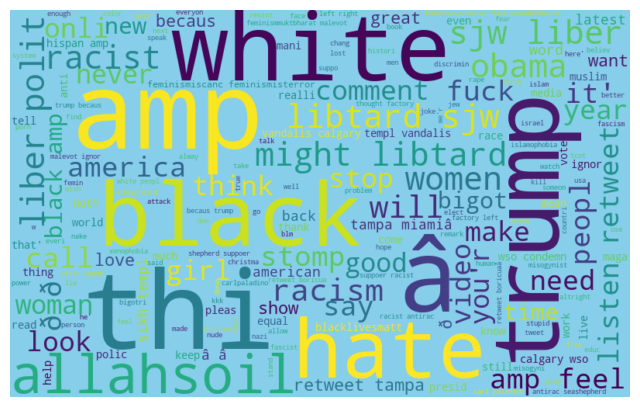

In [19]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=140,background_color="skyblue").generate(negative_words)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

__D) Understanding the impact of Hashtags on tweets sentiment__

In [20]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/abusive tweets.

__Non-Racist/abusive Tweets__

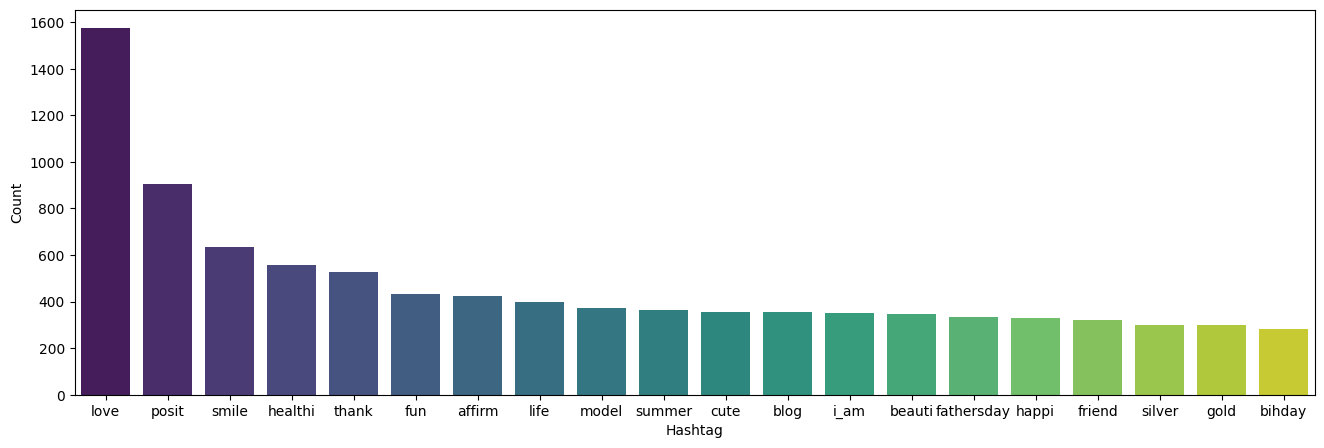

In [21]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette='viridis')
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/abusive tweets.

__Racist/abusive Tweets__

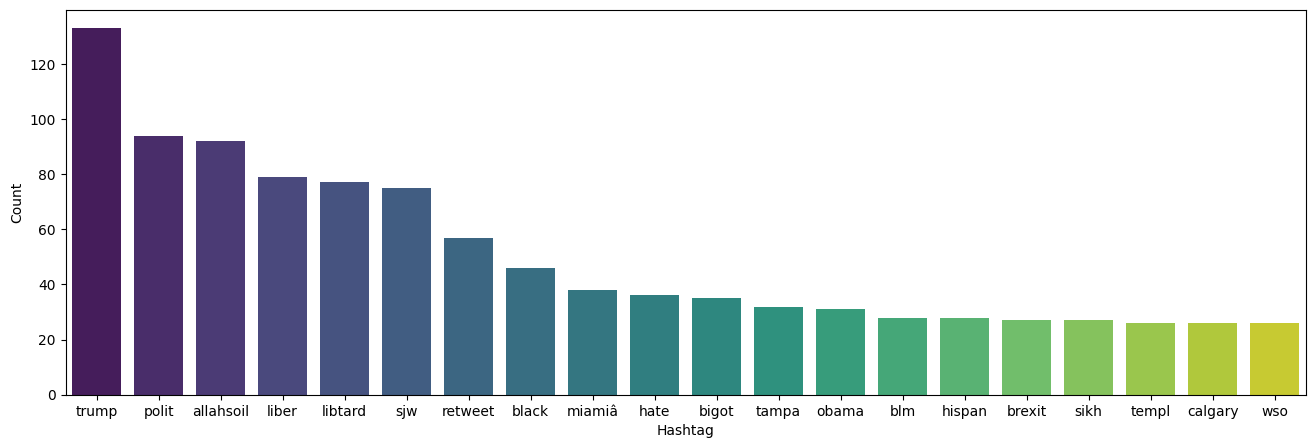

In [22]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count",palette='viridis')

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Extracting Features from Cleaned Tweets

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

### Bag-of-Words Features

In [24]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

### TF-IDF Features

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

### Word Embeddings

#### 1. Word2Vec Embeddings

In [26]:
import pandas as pd
import gensim


# Tokenize the tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

# Train the Word2Vec model
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,  
    window=5,
    min_count=2,
    sg=1,  
    hs=0,
    negative=10,
    workers=2,
    seed=34
)

# Train the model
model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)

(6703944, 8184140)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [27]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6441602110862732),
 ('#brunch', 0.5952492952346802),
 ('shopping!', 0.5883322358131409),
 ('lukey', 0.5789508819580078),
 ('enrout', 0.5769776701927185),
 ('music!', 0.5757326483726501),
 ('#toast', 0.5708416104316711),
 ('bondi', 0.5704150199890137),
 ('â\x9d¤â\x9d¤â\x9d¤â\x9d¤', 0.5703353881835938),
 ('sister!!', 0.5695081949234009)]

In [28]:
model_w2v.wv.most_similar(positive="trump")


[('donald', 0.6073940396308899),
 ('fraud.', 0.5795458555221558),
 ('phony.', 0.5701307058334351),
 ('sexist.', 0.5616206526756287),
 ('rally.', 0.558513343334198),
 ('presidential.', 0.5556092262268066),
 ('businessman:', 0.5556035041809082),
 ('quaint', 0.5500251650810242),
 ('suppoer.', 0.5498012900352478),
 ('jibe', 0.5475825667381287)]

In [29]:
# Access the word vector for 'food'
word_vector = model_w2v.wv['food']
print(word_vector)


[ 0.02352804 -0.48279926 -0.05085029  0.18491668 -0.20910157 -0.15859132
 -0.06827848 -0.68194366  0.25201592  0.7052448  -0.31233758  0.3085197
  0.25056267 -0.41449237  0.1031432   0.7274856   0.3776935   0.7165988
 -0.20977116 -0.6854359  -1.0342956   0.61198586 -0.08590384 -0.5132661
 -0.21866958  0.4712272  -0.02586121 -0.2556789  -0.20754175 -0.4445067
 -0.13541232 -0.20315732 -0.12100436  0.1559957  -0.15944855  0.1589493
  0.13934918  0.6068643   0.3982373   0.09108952 -0.7873428  -0.16884571
  0.3849869  -0.14384204 -0.28602368 -0.18144959  0.8596294  -0.05460196
 -0.16645893 -0.02923405  0.07089619  0.6250428  -0.04276125 -0.53469676
 -0.13997369  0.4618255   0.33789966  0.29204416 -0.03040807 -0.05544033
  0.61853015 -0.00621353 -0.78500324  0.09227     0.06877121 -0.12531492
  0.35279638  0.42357945  0.6155008  -0.6525436   0.74984604  0.2809428
 -0.3136563  -0.4177272  -0.3620052  -0.378553   -0.52109677  0.64688206
 -0.57793933 -0.27776545  0.4255     -0.288858   -0.30773

In [30]:
# Print the length of the word vector
print(len(word_vector))

200


__Preparing Vectors for Tweets__

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [31]:
# Define a function to get the average word vector for a tweet
def get_avg_word_vector(tokens, model, vector_size):
    vec = np.zeros((vector_size,))
    count = 0.
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1.
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set...

In [32]:
# Initialize an array to hold the word vectors
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

# Populate the array with the average word vector for each tweet
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_avg_word_vector(tokenized_tweet[i], model_w2v, 200)

# Create a DataFrame from the word vectors
wordvec_df = pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)

(49159, 200)


Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features. 

#### 2. Doc2Vec Embedding

<br>
Let's load the required libraries.

In [33]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to __labelise__ or __tag__ each tokenised tweet with unique IDs. We can do so by using Gensim’s *LabeledSentence()* function.

In [34]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [35]:
labeled_tweets = add_label(tokenized_tweet) 

Let's have a look at the result.

In [36]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', "can't", 'caus', 'they', "don't", 'offer', 'wheelchair', 'van', 'pdx.', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fare', 'talk', 'befor', 'they', 'leave.', 'chao', 'disput', 'when', 'they', 'there.', '#allshowandnogo'], tags=['tweet_5'])]

<br>
Now let's train a __doc2vec__ model. 

In [37]:
model_d2v = gensim.models.Doc2Vec(dm=1,  # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1,  # dm = 1 for using mean of the context word vectors
                                  vector_size=200,  # no. of desired features
                                  window=5,  # width of the context window
                                  negative=7,  # if > 0 then negative sampling will be used
                                  min_count=5,  # Ignores all words with total frequency lower than 2.
                                  workers=3,  # no. of cores
                                  alpha=0.1,  # learning rate
                                  seed=23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])


100%|██████████| 49159/49159 [00:00<00:00, 6099147.79it/s]


In [38]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

__Preparing doc2vec Feature Set__

In [39]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

---

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost
5. Naive Bayes
6. LightGBM 

### 1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Bag-of-Words Features

In [41]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [42]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)  # training the model

prediction = lreg.predict_proba(xvalid_bow)  # predicting on the validation set
prediction_int = prediction[:, 1] >= 0.3  # if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(int)

f1 = f1_score(yvalid, prediction_int)  # calculating f1 score
print(f"F1 Score: {f1}")


F1 Score: 0.545751633986928


Now let's make predictions for the test dataset and create a submission file.

In [43]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)  # use int instead of np.int
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_lreg_bow.csv', index=False)  # writing data to a CSV file


Public Leaderboard F1 Score: 0.546

#### TF-IDF Features

#### Word2Vec Features

In [44]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [45]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)  # use int instead of np.int

f1 = f1_score(yvalid, prediction_int)  # calculating f1 score
print(f"F1 Score: {f1}")


F1 Score: 0.6020710059171598


Public Leaderboard F1 Score: 0.5966

#### Doc2Vec Features

In [46]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [47]:
lreg.fit(xtrain_d2v, ytrain)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int) 
f1_score(yvalid, prediction_int)


0.6020710059171598

Public Leaderboard F1 Score: 0.337

Logistic Regression F1 Score: 0.545751633986928

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.62      0.49      0.55       684

    accuracy                           0.94      9589
   macro avg       0.79      0.73      0.76      9589
weighted avg       0.94      0.94      0.94      9589



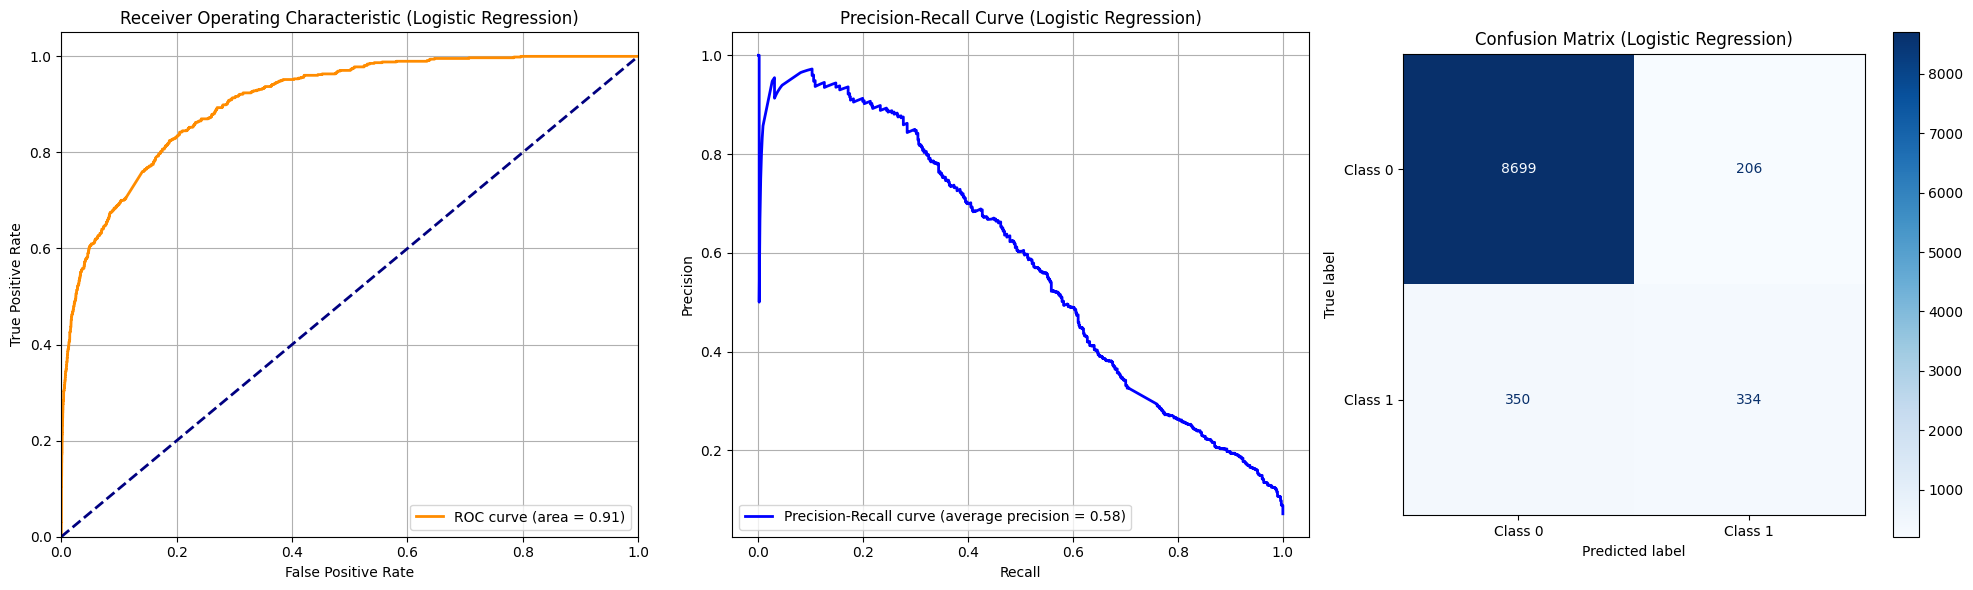

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report, f1_score)
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)  
log_reg.fit(xtrain_bow, ytrain)

# Predictions
lr_prediction = log_reg.predict_proba(xvalid_bow)
lr_prediction_int = lr_prediction[:, 1] >= 0.3
lr_prediction_int = lr_prediction_int.astype(int)

# Metrics
f1 = f1_score(yvalid, lr_prediction_int)
print(f"Logistic Regression F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(yvalid, lr_prediction_int))

# Test predictions
test_pred = log_reg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_log_reg_bow.csv', index=False)

# Compute ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(yvalid, lr_prediction[:, 1])
roc_auc_lr = roc_auc_score(yvalid, lr_prediction[:, 1])

# Compute Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(yvalid, lr_prediction[:, 1])
average_precision_lr = average_precision_score(yvalid, lr_prediction[:, 1])

# Compute Confusion Matrix
cm_lr = confusion_matrix(yvalid, lr_prediction_int)

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ROC Curve
axes[0].plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (Logistic Regression)')
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
axes[1].plot(recall_lr, precision_lr, color='blue', lw=2, label='Precision-Recall curve (average precision = %0.2f)' % average_precision_lr)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve (Logistic Regression)')
axes[1].legend(loc="lower left")
axes[1].grid()

# Confusion Matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Class 0', 'Class 1'])
disp_lr.plot(ax=axes[2], cmap=plt.cm.Blues, values_format='d')
axes[2].set_title('Confusion Matrix (Logistic Regression)')

plt.tight_layout()
plt.show()


---


### 2. Support Vector Machine

SVM F1 Score: 0.5514771709937332

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8905
           1       0.71      0.45      0.55       684

    accuracy                           0.95      9589
   macro avg       0.84      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589



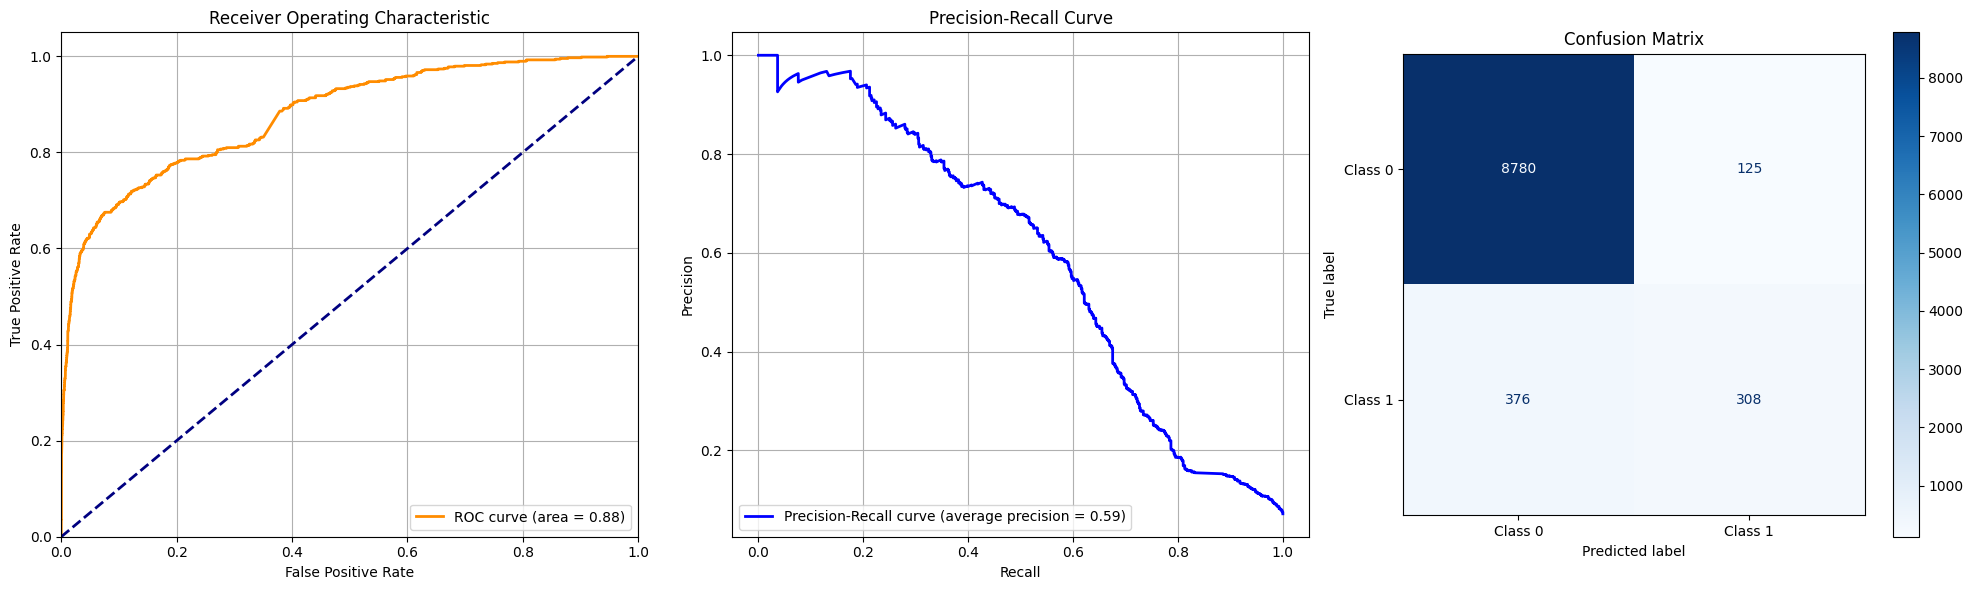

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report, f1_score)
import matplotlib.pyplot as plt
import numpy as np

# SVM Model
svm = SVC(probability=True, random_state=42)  
svm.fit(xtrain_bow, ytrain)

# Predictions
prediction = svm.predict_proba(xvalid_bow) 
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

# Metrics
f1 = f1_score(yvalid, prediction_int)
print(f"SVM F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(yvalid, prediction_int))

# Test predictions
test_pred = svm.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_svm_bow.csv', index=False)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(yvalid, prediction[:, 1])
roc_auc = roc_auc_score(yvalid, prediction[:, 1])

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(yvalid, prediction[:, 1])
average_precision = average_precision_score(yvalid, prediction[:, 1])

# Compute Confusion Matrix
cm = confusion_matrix(yvalid, prediction_int)

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ROC Curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
axes[1].plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (average precision = %0.2f)' % average_precision)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower left")
axes[1].grid()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(ax=axes[2], cmap=plt.cm.Blues, values_format='d')
axes[2].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()


---

### 3. RandomForest

Random Forest F1 Score: 0.4878048780487805

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8905
           1       0.40      0.63      0.49       684

    accuracy                           0.91      9589
   macro avg       0.68      0.78      0.72      9589
weighted avg       0.93      0.91      0.92      9589



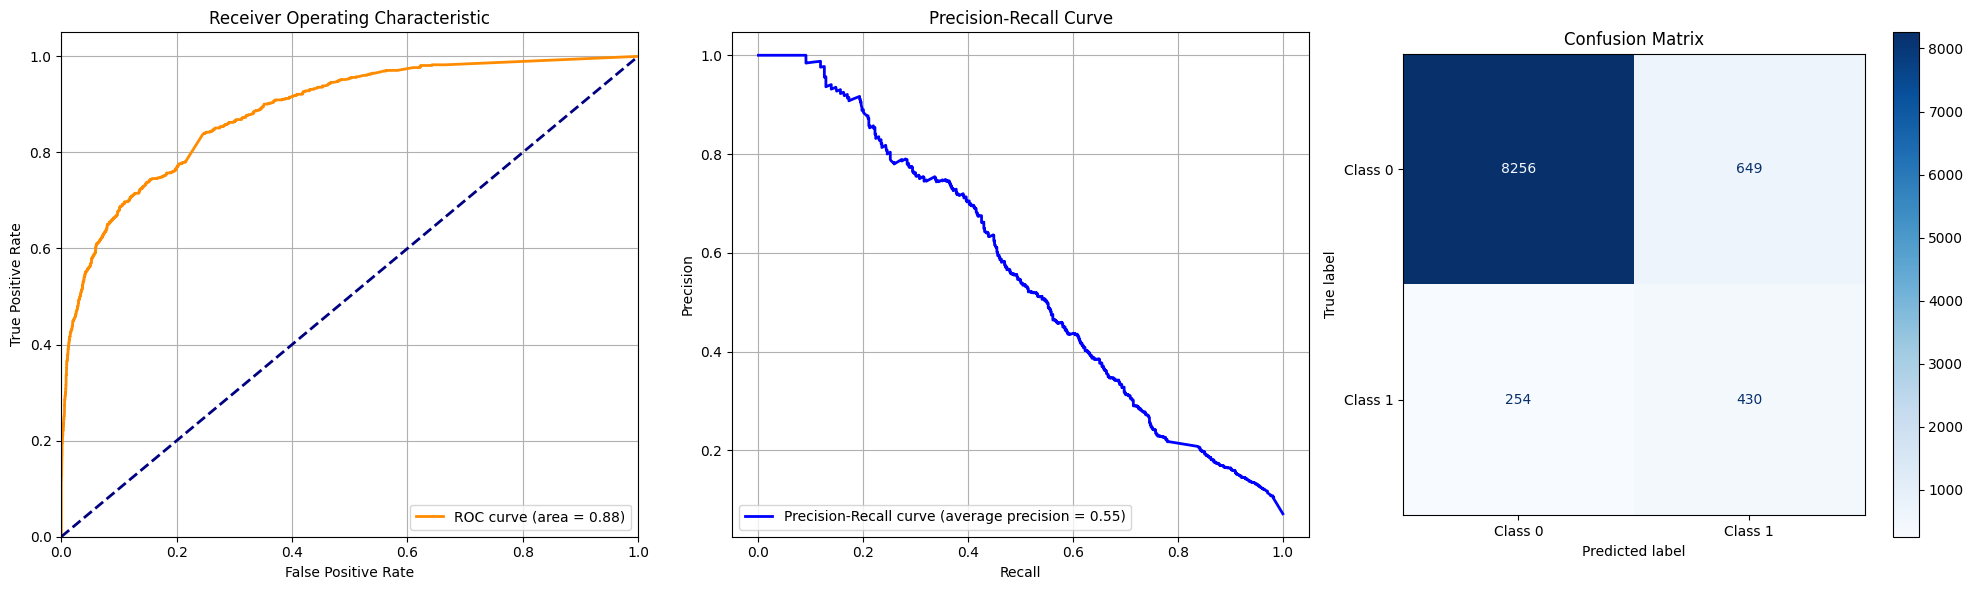

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report, f1_score)
import matplotlib.pyplot as plt
import numpy as np

# Random Forest Model
rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(xtrain_bow, ytrain)

# Predictions
prediction = rf.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

# Metrics
f1 = f1_score(yvalid, prediction_int)
print(f"Random Forest F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(yvalid, prediction_int))

# Test predictions
test_pred = rf.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_rf_bow.csv', index=False)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(yvalid, prediction[:, 1])
roc_auc = roc_auc_score(yvalid, prediction[:, 1])

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(yvalid, prediction[:, 1])
average_precision = average_precision_score(yvalid, prediction[:, 1])

# Compute Confusion Matrix
cm = confusion_matrix(yvalid, prediction_int)

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ROC Curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
axes[1].plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (average precision = %0.2f)' % average_precision)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower left")
axes[1].grid()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(ax=axes[2], cmap=plt.cm.Blues, values_format='d')
axes[2].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()


---

### 4. XGBoost

XGBoost F1 Score: 0.5371329879101899

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.66      0.45      0.54       684

    accuracy                           0.94      9589
   macro avg       0.81      0.72      0.75      9589
weighted avg       0.94      0.94      0.94      9589



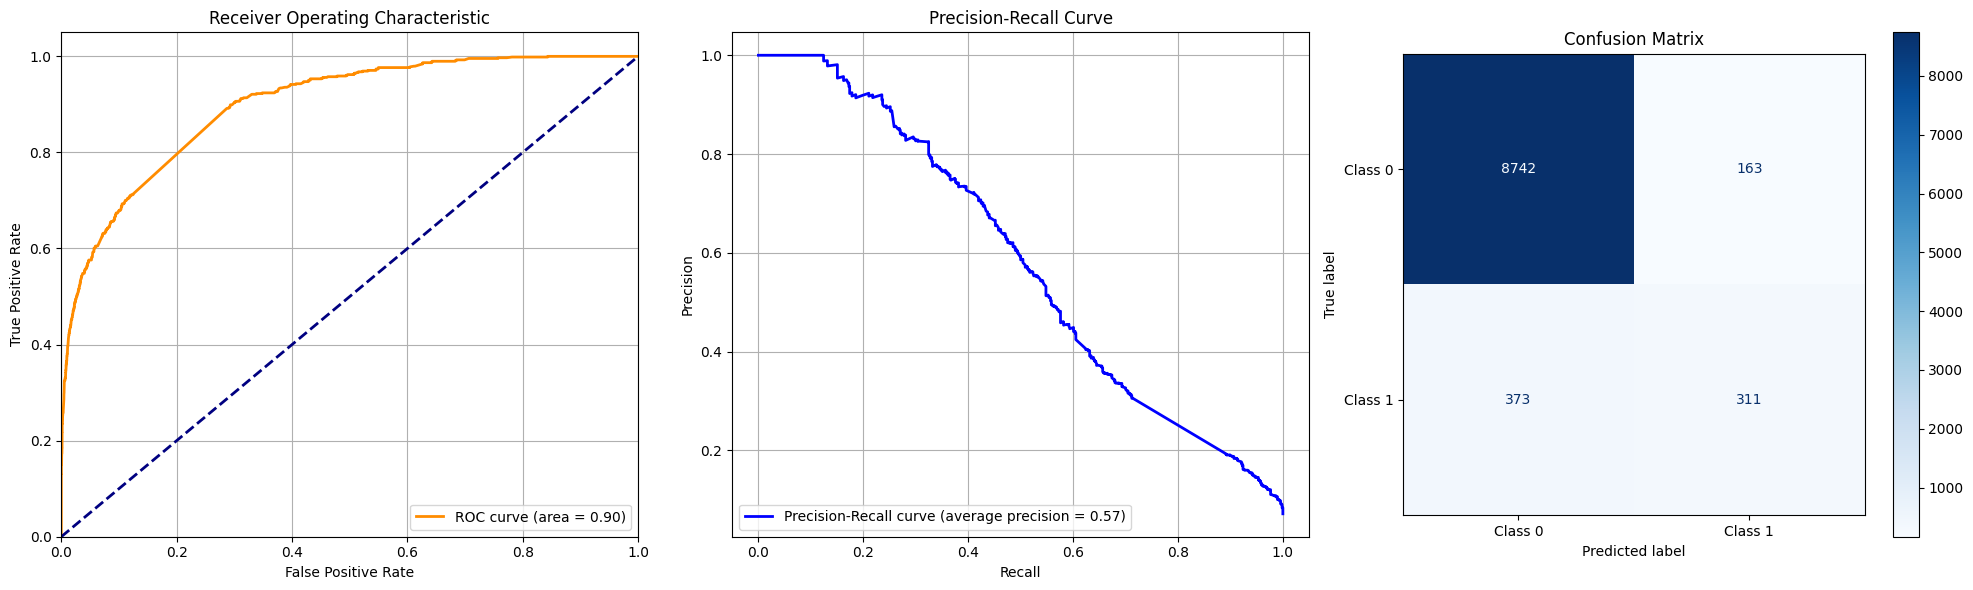

In [51]:
import xgboost as xgb
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report, f1_score)
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

# XGBoost Model
xgboost_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(xtrain_bow, ytrain)

# Predictions
prediction = xgboost_model.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

# Metrics
f1 = f1_score(yvalid, prediction_int)
print(f"XGBoost F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(yvalid, prediction_int))

# Test predictions
test_pred = xgboost_model.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(yvalid, prediction[:, 1])
roc_auc = roc_auc_score(yvalid, prediction[:, 1])

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(yvalid, prediction[:, 1])
average_precision = average_precision_score(yvalid, prediction[:, 1])

# Compute Confusion Matrix
cm = confusion_matrix(yvalid, prediction_int)

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ROC Curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
axes[1].plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (average precision = {average_precision:.2f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower left")
axes[1].grid()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(ax=axes[2], cmap=plt.cm.Blues, values_format='d')
axes[2].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()


---

### LightGBM 

A fast and efficient gradient boosting framework that's particularly useful for large datasets.

LightGBM F1 Score: 0.5539

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.63      0.50      0.55       684

    accuracy                           0.94      9589
   macro avg       0.79      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



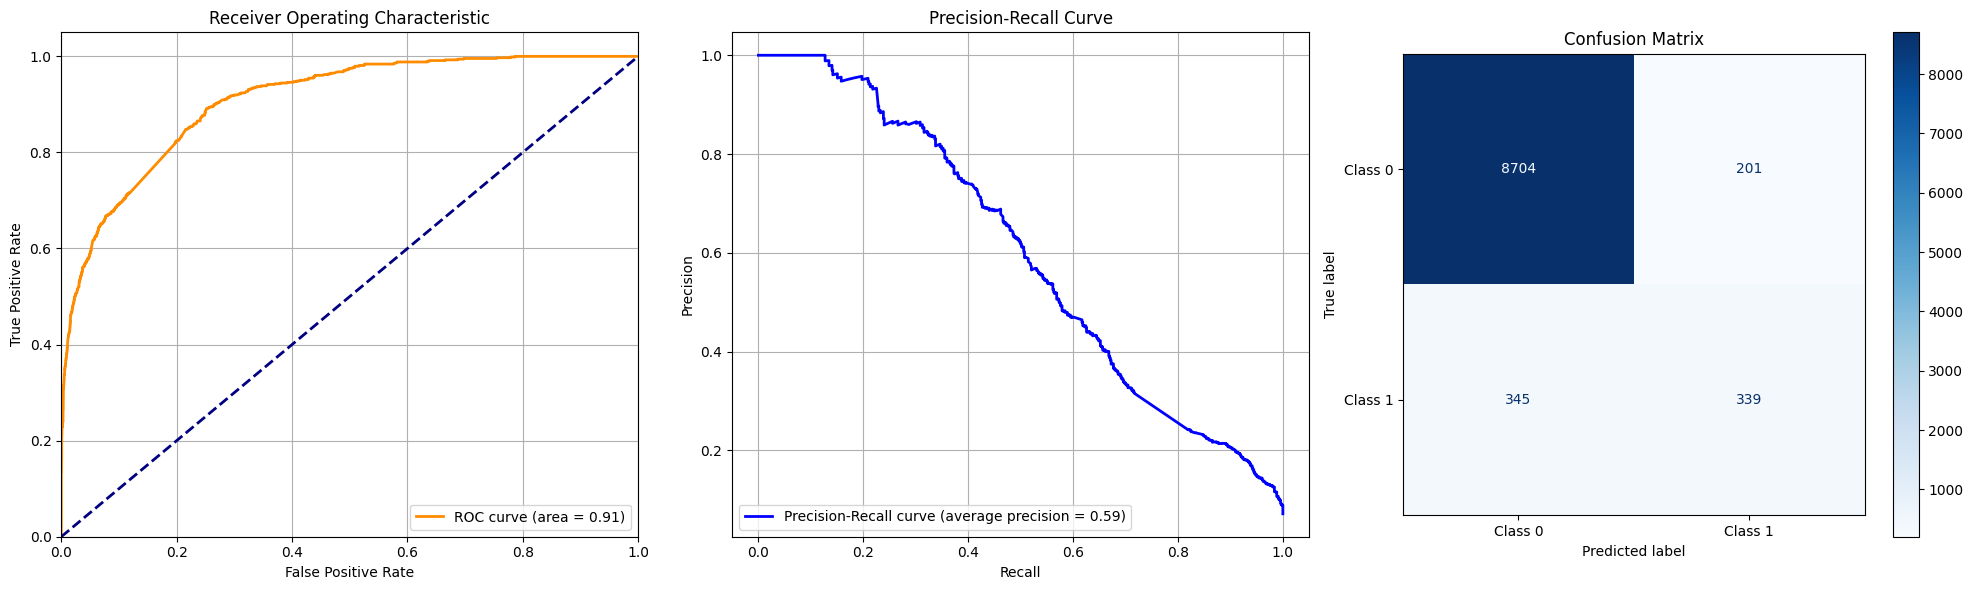

In [52]:
import lightgbm as lgb
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report, f1_score)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for CSV handling

# Convert feature matrices to float32
xtrain_bow = xtrain_bow.astype(np.float32)
xvalid_bow = xvalid_bow.astype(np.float32)
test_bow = test_bow.astype(np.float32)

# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(xtrain_bow, ytrain)

# Predictions
prediction = lgb_model.predict_proba(xvalid_bow)
prediction_int = (prediction[:, 1] >= 0.3).astype(int)

# Metrics
f1 = f1_score(yvalid, prediction_int)
print(f"LightGBM F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(yvalid, prediction_int))

# Test Predictions
test_pred = lgb_model.predict_proba(test_bow)
test_pred_int = (test_pred[:, 1] >= 0.3).astype(int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_lgb_bow.csv', index=False)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(yvalid, prediction[:, 1])
roc_auc = roc_auc_score(yvalid, prediction[:, 1])

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(yvalid, prediction[:, 1])
average_precision = average_precision_score(yvalid, prediction[:, 1])

# Compute Confusion Matrix
cm = confusion_matrix(yvalid, prediction_int)

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ROC Curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
axes[1].plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (average precision = {average_precision:.2f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower left")
axes[1].grid()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(ax=axes[2], cmap=plt.cm.Blues, values_format='d')
axes[2].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()


---

### Inferences

1. Logistic Regression provided a straightforward and interpretable model, showing reasonable performance with moderate precision and recall.   
2. SVM delivered good performance with a balanced trade-off between precision and recall, making it suitable for this task.
3. Random Forest demonstrated strong classification performance with good handling of imbalanced data, though its results were not the top performer.   
4. Gradient Boosting Classifier showed promising results, effectively handling complex data patterns and improving classification accuracy.   
5. LightGBM excelled with the highest F1 score and ROC AUC, proving to be highly effective in distinguishing between classes and handling large datasets.    

### **Conclusion:**  
1. LightGBM is likely the best model based on its highest F1 score and balanced precision and recall, making it a strong choice for this task.  

2. SVM is also a strong contender due to its high precision, which could be more important depending on the application (e.g., if minimizing false positives is crucial).

# LightGBM is the best model due to its superior performance in accuracy and robustness across the dataset.